# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error,  ConfusionMatrixDisplay, roc_auc_score, precision_score, confusion_matrix, accuracy_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import set_config
set_config(display = 'diagram')

random_state = 7
max_features= 1000
max_iter = 2000

----
### Reading in the Data

In [2]:
debate_df = pd.read_csv("../Data/debate_filtered.csv")
debate_df.head(3)

,speaker,text,date,party,tokens,polarity,subjectivity
0,PENCE,"Thank you.,",September 29 2020,Republican,"['you', 'thank']",0.000000,0.000000
1,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,"['our', 'what', 'best', 'informed', 'be', 'pre...",0.169603,0.348862
2,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,"['our', 'since', 'needed', 'what', 'resources'...",0.111378,0.423008


----
### Functions

In [3]:
# function to automate fitting training data to model then scoring it
def pipes(vectorizers, classifiers, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
    for i in vectorizers:
        for j in classifiers:
            pipe = make_pipeline(
                i,
                j
            )
            pipe.fit(X_train, y_train)
            print(f'{i} and {j} : {(pipe.score(X_test, y_test)).round(5)}')
    return

In [4]:
# function to lemmatize the text
def lem_sent(sentence):
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    lemmatizer = WordNetLemmatizer()
    
    words = my_tokenizer.tokenize(sentence.lower())
    lem = [lemmatizer.lemmatize(i) for i in words]
    
    return " ".join(lem)
debate_df['lemmas'] = debate_df['text'].map(lem_sent)

In [5]:
# function to stem the text
def stem_sent(sentence):
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    p_stemmer = PorterStemmer()
    
    words = my_tokenizer.tokenize(sentence.lower())
    pstem = [p_stemmer.stem(i) for i in words]
    
    return " ".join(pstem)
debate_df['stems'] = debate_df['text'].map(stem_sent)

In [6]:
debate_df.head(3)

,speaker,text,date,party,tokens,polarity,subjectivity,lemmas,stems
0,PENCE,"Thank you.,",September 29 2020,Republican,"['you', 'thank']",0.000000,0.000000,thank you,thank you
1,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,"['our', 'what', 'best', 'informed', 'be', 'pre...",0.169603,0.348862,thank you susan well the american people have ...,thank you susan well the american peopl have w...
2,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,"['our', 'since', 'needed', 'what', 'resources'...",0.111378,0.423008,susan thank you and i want to thank the commis...,susan thank you and i want to thank the commis...


----
## Baseline Model

In [7]:
debate_df["party"].value_counts(normalize=True)

Republican    0.547623
Democrat      0.452377
Name: party, dtype: float64

* The baseline score is 54.7%

-------
### Train/Test multiple models with normal, lemmatized, and stemmed text 

In [8]:
vectorizers = [CountVectorizer( ),
               TfidfVectorizer()]

classifiers = [MultinomialNB(),
               LogisticRegression(),
               BaggingClassifier(),
               RandomForestClassifier(),
               ExtraTreesClassifier(),
               KNeighborsClassifier(),
               SGDClassifier()]

## Normal Text

In [9]:
pipes(vectorizers, classifiers, debate_df["text"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.7108


C:\Users\15619\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CountVectorizer() and LogisticRegression() : 0.69379
CountVectorizer() and BaggingClassifier() : 0.64349
CountVectorizer() and RandomForestClassifier() : 0.68491
CountVectorizer() and ExtraTreesClassifier() : 0.70414
CountVectorizer() and KNeighborsClassifier() : 0.55917
CountVectorizer() and SGDClassifier() : 0.67012
TfidfVectorizer() and MultinomialNB() : 0.64423
TfidfVectorizer() and LogisticRegression() : 0.69453
TfidfVectorizer() and BaggingClassifier() : 0.64793
TfidfVectorizer() and RandomForestClassifier() : 0.69749
TfidfVectorizer() and ExtraTreesClassifier() : 0.69749
TfidfVectorizer() and KNeighborsClassifier() : 0.67678
TfidfVectorizer() and SGDClassifier() : 0.7034


--------
## Lemmatized Text

In [10]:
pipes(vectorizers, classifiers, debate_df["lemmas"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.7034


C:\Users\15619\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CountVectorizer() and LogisticRegression() : 0.69453
CountVectorizer() and BaggingClassifier() : 0.63979
CountVectorizer() and RandomForestClassifier() : 0.69009
CountVectorizer() and ExtraTreesClassifier() : 0.70118
CountVectorizer() and KNeighborsClassifier() : 0.56805
CountVectorizer() and SGDClassifier() : 0.69749
TfidfVectorizer() and MultinomialNB() : 0.64719
TfidfVectorizer() and LogisticRegression() : 0.69601
TfidfVectorizer() and BaggingClassifier() : 0.64349
TfidfVectorizer() and RandomForestClassifier() : 0.70488
TfidfVectorizer() and ExtraTreesClassifier() : 0.70118
TfidfVectorizer() and KNeighborsClassifier() : 0.67604
TfidfVectorizer() and SGDClassifier() : 0.7071



-------
## Stemmed Text

In [11]:
pipes(vectorizers, classifiers, debate_df["stems"] , debate_df["party"])

CountVectorizer() and MultinomialNB() : 0.70118


C:\Users\15619\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CountVectorizer() and LogisticRegression() : 0.70636
CountVectorizer() and BaggingClassifier() : 0.64793
CountVectorizer() and RandomForestClassifier() : 0.69675
CountVectorizer() and ExtraTreesClassifier() : 0.70414
CountVectorizer() and KNeighborsClassifier() : 0.55695
CountVectorizer() and SGDClassifier() : 0.69601
TfidfVectorizer() and MultinomialNB() : 0.6568
TfidfVectorizer() and LogisticRegression() : 0.7108
TfidfVectorizer() and BaggingClassifier() : 0.63683
TfidfVectorizer() and RandomForestClassifier() : 0.68269
TfidfVectorizer() and ExtraTreesClassifier() : 0.7108
TfidfVectorizer() and KNeighborsClassifier() : 0.67899
TfidfVectorizer() and SGDClassifier() : 0.69896


* The best performing model is the Logistic Regressioon classifier and TfidfVectorizer using stemmed text
----
## Gridsearching the Best Models

In [14]:
X_train, X_test, y_train, y_test = train_test_split(debate_df["stems"], debate_df["party"])
pipe = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()   
)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7034023668639053

In [28]:
#takes a  few minutes to run
params = {
    'tfidfvectorizer__binary': [False, True], 
    'tfidfvectorizer__ngram_range': [(1, 1),(1, 2),(1, 3), (1, 4)],
    'logisticregression__C': [1.5, 1.7, 2],
    'logisticregression__fit_intercept': [True,False]
}
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.7433431952662722

In [29]:
gs.best_params_

{'logisticregression__C': 2,
 'logisticregression__fit_intercept': True,
 'tfidfvectorizer__binary': True,
 'tfidfvectorizer__ngram_range': (1, 4)}

----
## Confusion Matrix

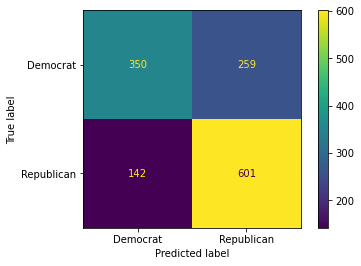

In [33]:
# Before Gridsearch
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

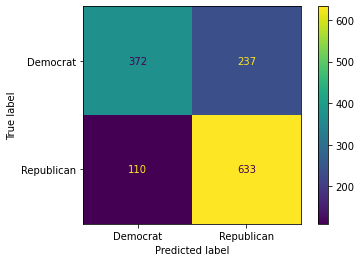

In [30]:
#After Gridseach
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

In [31]:
'''
*REMOVE BEFORE SUBMISSION*
Update the  notebook if I come up with a better model
Fix convergence warnings
feature engineering
try more ngrams for gs
'''

'\n*REMOVE BEFORE SUBMISSION*\nUpdate the  notebook if I come up with a better model\nFix convergence warnings\nfeature engineering\ntry more ngrams for gs\n'